# Projet 3
# Concevez une application au service de la santé publique

# Importer les données

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df_food = pd.read_csv('en.openfoodfacts.org.products.csv', 
                      sep = '\t', dtype = {'code': 'str'}, low_memory=False)

# Informations générales sur les données récoltées

In [2]:
#Afficher toutes les colonnes
pd.set_option('display.max_columns', None)

df_food.sample(5)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,serving_size,serving_quantity,no_nutriments,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,brand_owner,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kj_100g,energy-kcal_100g,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,-soluble-fiber_100g,-insoluble-fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
804398,3700216252978,http://world-en.openfoodfacts.org/product/3700...,kiliweb,1571388080,2019-10-18T08:41:20Z,1588331934,2020-05-01T11:18:54Z,Graines de chia,NaN,650 g,NaN,NaN,NaN,NaN,Chia,"en:plant-based-foods-and-beverages,en:plant-ba...","Plant-based foods and beverages,Plant-based fo...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:fr,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,c,NaN,Cereals and potatoes,Cereals,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",NaN,en:chia,Chia,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,NaN,NaN,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,NaN,486.0,2033.0,NaN,31.00,4.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [3]:
# Avoir des info sur le df Country
df_food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1397452 entries, 0 to 1397451
Columns: 181 entries, code to carnitine_100g
dtypes: float64(122), int64(2), object(57)
memory usage: 1.9+ GB


In [4]:
# Dimensions du tableau 
df_food.shape

(1397452, 181)

In [5]:
# Lister toutes les colonnes 
colonnes = list(df_food.columns.values)
colonnes

['code',
 'url',
 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'product_name',
 'generic_name',
 'quantity',
 'packaging',
 'packaging_tags',
 'brands',
 'brands_tags',
 'categories',
 'categories_tags',
 'categories_en',
 'origins',
 'origins_tags',
 'manufacturing_places',
 'manufacturing_places_tags',
 'labels',
 'labels_tags',
 'labels_en',
 'emb_codes',
 'emb_codes_tags',
 'first_packaging_code_geo',
 'cities',
 'cities_tags',
 'purchase_places',
 'stores',
 'countries',
 'countries_tags',
 'countries_en',
 'ingredients_text',
 'allergens',
 'allergens_en',
 'traces',
 'traces_tags',
 'traces_en',
 'serving_size',
 'serving_quantity',
 'no_nutriments',
 'additives_n',
 'additives',
 'additives_tags',
 'additives_en',
 'ingredients_from_palm_oil_n',
 'ingredients_from_palm_oil',
 'ingredients_from_palm_oil_tags',
 'ingredients_that_may_be_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil',
 'ingredients_that_may_be_from_palm_

In [6]:
#Afficher toutes les lignes
pd.set_option('display.max_rows', None)

# Observer les types de données pour chaque colonne
df_food.dtypes

code                                           object
url                                            object
creator                                        object
created_t                                       int64
created_datetime                               object
last_modified_t                                 int64
last_modified_datetime                         object
product_name                                   object
generic_name                                   object
quantity                                       object
packaging                                      object
packaging_tags                                 object
brands                                         object
brands_tags                                    object
categories                                     object
categories_tags                                object
categories_en                                  object
origins                                        object
origins_tags                

In [7]:
# Compte des différents types de données du df
df_food.dtypes.value_counts()

float64    122
object      57
int64        2
dtype: int64

([<matplotlib.patches.Wedge at 0x7fa8eed241d0>,
 [Text(-1.0250679202212323, -0.6238876172303129, 'float'),
  Text(1.133278751515527, 0.6369295654649805, 'object'),
  Text(0.048589407830637796, 1.3991565564463, 'int')])

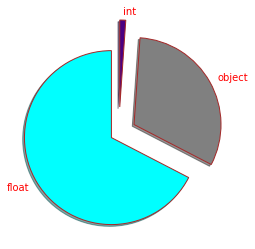

In [9]:
# Faire un graphique avec des différents types de données

piechart = df_food.dtypes.value_counts()

# Rajouter légende
legende = ['float', 'object', 'int']

# Creating explode data 
explode = (0.1, 0.2, 0.3 ) 
  
# Creating color parameters 
colors = ('cyan', 
          'grey', 'indigo') 
  
# Wedge properties 
wp = { 'linewidth' : 1, 'edgecolor' : 'brown' } 

plt.pie(piechart, 
        explode = explode,
        labels = legende, 
        shadow = True, 
        colors = colors, 
        startangle = 90, 
        wedgeprops = wp, 
        textprops = dict(color ='red'))

In [3]:
# Faire une copie pour pouvoir travailler dessus 
df = df_food.copy()

# Traitement des doublons

In [4]:
# Trier en fonction de 'last_modified_t'
df.sort_values('last_modified_t', inplace=True)

In [12]:
df.head(5)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,serving_size,serving_quantity,no_nutriments,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,brand_owner,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kj_100g,energy-kcal_100g,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,-soluble-fiber_100g,-insoluble-fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
585839,3229820781136,http://world-en.openfoodfacts.org/product/3229...,stephane,1333872532,2012-04-08T08:08:52Z,1333872755,2012-04-08T08:12:35Z,Poudre cristallisée à base de bouleau - Xylitol,NaN,200 g,"Sachet,Plastique","sachet,plastique",Vivis,vivis,Édulcorants,en:sweeteners,Sweeteners,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France,Xylitol (100%),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,en:e967,E967 - Xylitol,0.0,NaN,NaN,0.0,NaN,NaN,2.0,b,4.0,unknown,unknown,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","To be checked,Complete,Nutrition facts complet...",NaN,en:sweeteners,Sweeteners,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.

In [5]:
# Eliminer doublons  
df.drop_duplicates(subset=['code'], keep='last', inplace=True)

In [14]:
df.sample(5)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,serving_size,serving_quantity,no_nutriments,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,brand_owner,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kj_100g,energy-kcal_100g,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,-soluble-fiber_100g,-insoluble-fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
440663,20713447,http://world-en.openfoodfacts.org/product/2071...,kiliweb,1487272979,2017-02-16T19:22:59Z,1585568602,2020-03-30T11:43:22Z,Salade Jeunes Pousses,NaN,4 x 125 g,"Sache,frais,plastique","sache,frais,plastique",Saladinettes,saladinettes,"Aliments et boissons à base de végétaux, Alime...","en:plant-based-foods-and-beverages,en:plant-ba...","Plant-based foods and beverages,Plant-based fo...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LIDL,France,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-6.0,a,NaN,Fruits and vegetables,Vegetables,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",NaN,en:leaf-salads,Leaf salads,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.open

# Traitement des Valeurs Manquantes - NaN 

## Observation des Valeurs Manquantes

Text(0.5, 1, 'Remplissage des diverses colonnes du data set')

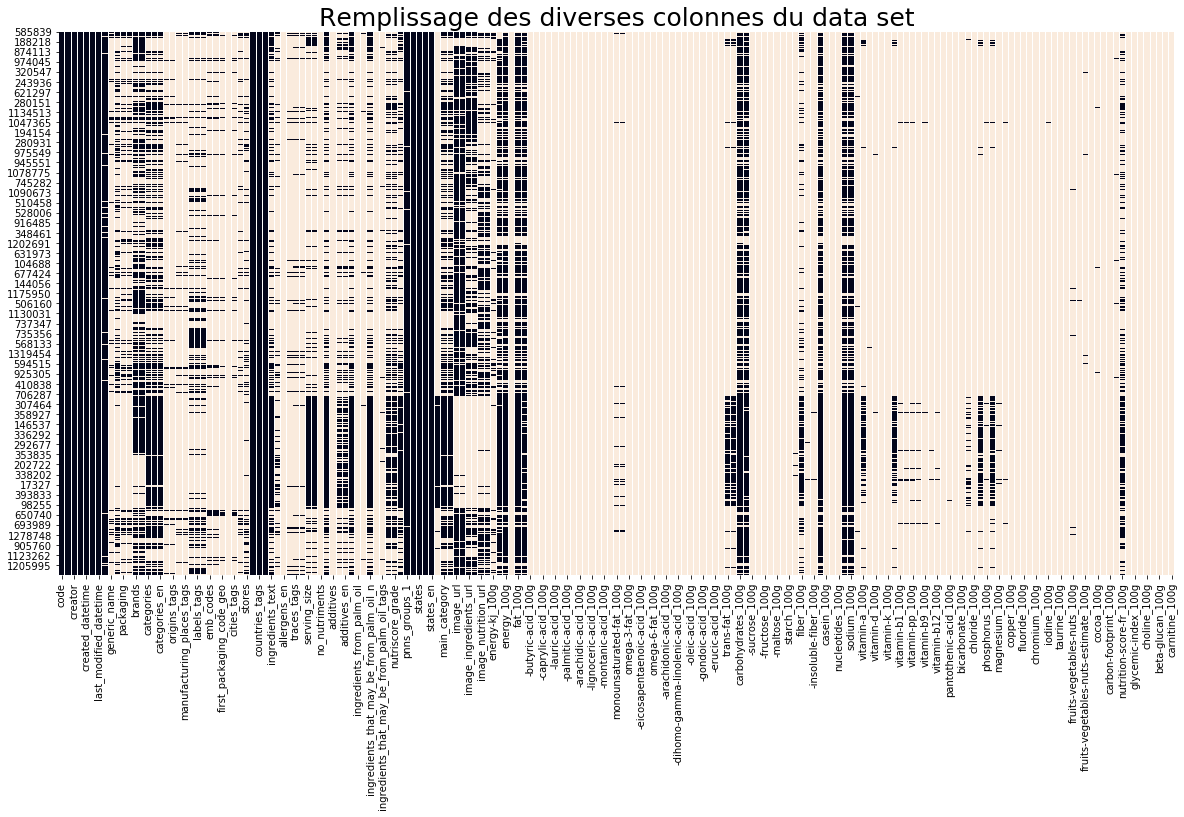

In [12]:
# Visualisation du remplissage du data set 

#Taille
plt.figure(figsize=(20,10))

# Titre 
plt.title('Remplissage des diverses colonnes du data set', size=25)

sns.heatmap(df.isna(), cbar=False) #cbar=False

In [15]:
# Somme des valeurs manquantes par colonnes
df.isna().sum()

code                                                0
url                                                 0
creator                                             4
created_t                                           0
created_datetime                                    0
last_modified_t                                     0
last_modified_datetime                              0
product_name                                    63084
generic_name                                  1294477
quantity                                       998938
packaging                                     1174455
packaging_tags                                1174465
brands                                         617882
brands_tags                                    617932
categories                                     670415
categories_tags                                670419
categories_en                                  670419
origins                                       1335956
origins_tags                

In [16]:
# Observer le ratio de NaN
pd.isnull(df).sum()/df.size

code                                          0.000000e+00
url                                           0.000000e+00
creator                                       1.581692e-08
created_t                                     0.000000e+00
created_datetime                              0.000000e+00
last_modified_t                               0.000000e+00
last_modified_datetime                        0.000000e+00
product_name                                  2.494486e-04
generic_name                                  5.118660e-03
quantity                                      3.950031e-03
packaging                                     4.644065e-03
packaging_tags                                4.644105e-03
brands                                        2.443247e-03
brands_tags                                   2.443445e-03
categories                                    2.650975e-03
categories_tags                               2.650991e-03
categories_en                                 2.650991e-

In [17]:
# Taux de valeurs manquantes par colonnes
missing_rate = df.isna().sum()/df.shape[0]

# Trier par ordre croissant
missing_rate.sort_values(ascending=True)

code                                          0.000000
states_en                                     0.000000
states                                        0.000000
last_modified_datetime                        0.000000
last_modified_t                               0.000000
states_tags                                   0.000000
created_t                                     0.000000
url                                           0.000000
created_datetime                              0.000000
creator                                       0.000003
pnns_groups_2                                 0.000171
countries                                     0.001576
countries_tags                                0.001577
countries_en                                  0.001577
pnns_groups_1                                 0.009782
product_name                                  0.045150
energy_100g                                   0.191797
proteins_100g                                 0.196614
fat_100g  

In [19]:
# Observer les NaN
# Missing Indicator 
from sklearn.impute import MissingIndicator

X = df_food

MissingIndicator().fit_transform(X)

array([[False, False,  True, ...,  True,  True,  True],
       [False, False,  True, ...,  True,  True,  True],
       [False, False,  True, ...,  True,  True,  True],
       ...,
       [False, False,  True, ...,  True,  True,  True],
       [False, False,  True, ...,  True,  True,  True],
       [False,  True,  True, ...,  True,  True,  True]])

## Filtrage en fonction de données manquantes

In [6]:
# Enlever les lignes remplies de NaN
df.dropna

<bound method DataFrame.dropna of                   code                                                url  \
585839   3229820781136  http://world-en.openfoodfacts.org/product/3229...   
1061999       56094381  http://world-en.openfoodfacts.org/product/5609...   
241673        01922305  http://world-en.openfoodfacts.org/product/0192...   
1109913     7520800065  http://world-en.openfoodfacts.org/product/7520...   
894230   4005514171303  http://world-en.openfoodfacts.org/product/4005...   
...                ...                                                ...   
1034063  5410396152934  http://world-en.openfoodfacts.org/product/5410...   
1142533  7622210240767  http://world-en.openfoodfacts.org/product/7622...   
1153397  7790407031556  http://world-en.openfoodfacts.org/product/7790...   
1155538  7802900234218  http://world-en.openfoodfacts.org/product/7802...   
1153786  7791058002421  http://world-en.openfoodfacts.org/product/7791...   

                            creator   cre

In [7]:
# Enlever les lignes pour lesquelles 'code' ou 'url' est NaN
#how='any' : if one of the named columns have a missing value

df.dropna(subset=['code'], how='any', inplace=True) #inplace=True drop for real

In [8]:
# Afficher seulement les variables dont plus 90% des données sont manquantes

df.columns[df.isna().sum()/df.shape[0] > 0.9]

Index(['generic_name', 'origins', 'origins_tags', 'manufacturing_places',
       'manufacturing_places_tags', 'emb_codes', 'emb_codes_tags',
       'first_packaging_code_geo', 'cities', 'cities_tags',
       ...
       'carbon-footprint_100g', 'carbon-footprint-from-meat-or-fish_100g',
       'nutrition-score-uk_100g', 'glycemic-index_100g', 'water-hardness_100g',
       'choline_100g', 'phylloquinone_100g', 'beta-glucan_100g',
       'inositol_100g', 'carnitine_100g'],
      dtype='object', length=115)

In [9]:
# Afficher le df des variables dont 90% des données sont manquantes

df[df.columns[df.isna().sum()/df.shape[0] > 0.9]]

,generic_name,origins,origins_tags,manufacturing_places,manufacturing_places_tags,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,allergens_en,traces,traces_tags,traces_en,no_nutriments,additives,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,energy-kj_100g,energy-from-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,-soluble-fiber_100g,-insoluble-fiber_100g,casein_100g,serum-proteins_100g,nucleotides_100g,alcohol_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,phosphorus_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
585839,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1061999,Tonic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
241673,Bonbons,Mexico,mexico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1109913,Coriandre en tube,Canada,canada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [10]:
# Définir notre df comme ne contenant que les variables contenant moins de 90% de données manquantes

df = df[df.columns[df.isna().sum()/df.shape[0] < 0.9]]

## Repérer les variables pertinentes

Text(0.5, 1, 'Remplissage des colonnes du data set contenant moins de 90% de données manquantes')

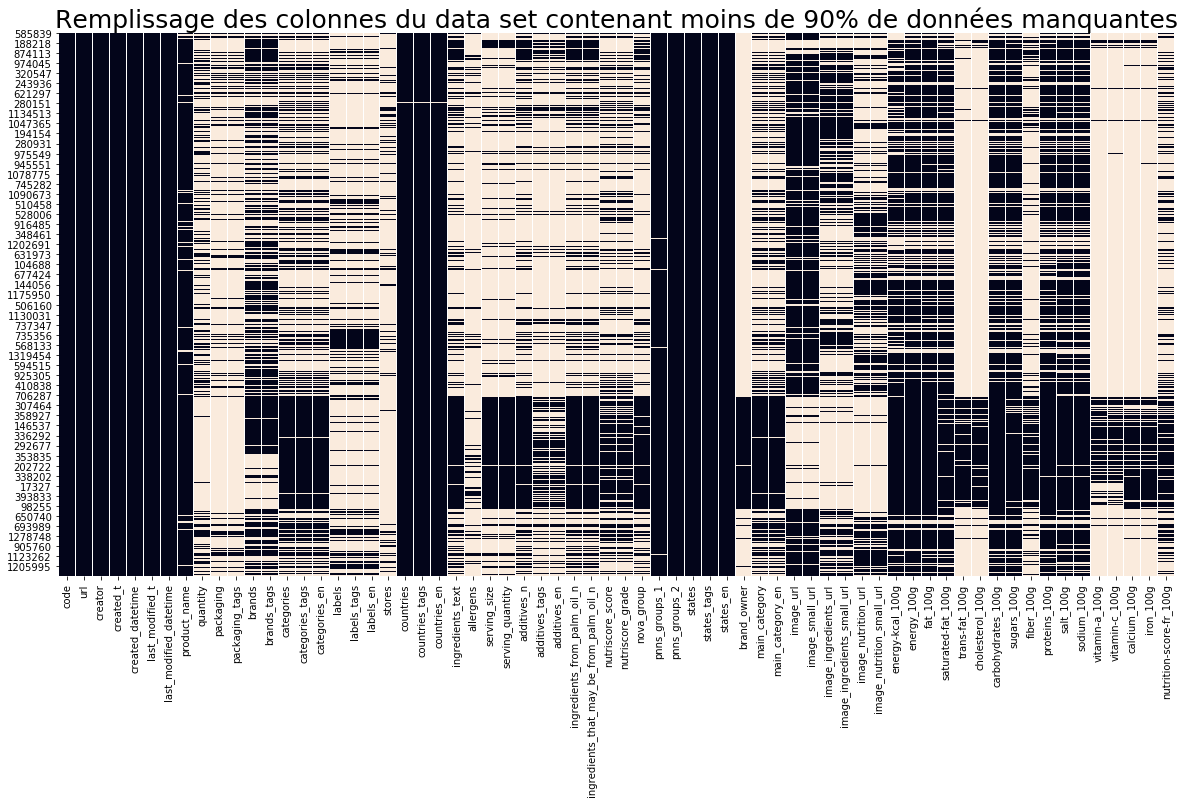

In [18]:
# Observation du taux de remplissage du df après filtrage 

#Taille
plt.figure(figsize=(20,10))

# Titre 
plt.title('Remplissage des colonnes du data set contenant moins de 90% de données manquantes', size=25)

sns.heatmap(df.isna(), cbar=False)

In [11]:
# Colonnes avec le plus de données disponibles : taux de NaN inférieur à 0,65

more_data = df.columns[df.isna().sum()/df.shape[0] < 0.65]
more_data

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name', 'brands',
       'brands_tags', 'categories', 'categories_tags', 'categories_en',
       'countries', 'countries_tags', 'countries_en', 'ingredients_text',
       'additives_n', 'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutriscore_score',
       'nutriscore_grade', 'nova_group', 'pnns_groups_1', 'pnns_groups_2',
       'states', 'states_tags', 'states_en', 'main_category',
       'main_category_en', 'image_url', 'image_small_url',
       'image_ingredients_url', 'image_ingredients_small_url',
       'image_nutrition_url', 'image_nutrition_small_url', 'energy-kcal_100g',
       'energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g',
       'sugars_100g', 'proteins_100g', 'salt_100g', 'sodium_100g',
       'nutrition-score-fr_100g'],
      dtype='object')

In [12]:
# Colonnes avec moins de données disponibles : taux de NaN entre 0,9 et 0,65

fewer_data = df.columns[(df.isna().sum()/df.shape[0] < 0.9) & (df.isna().sum()/df.shape[0] > 0.65)]
fewer_data

Index(['quantity', 'packaging', 'packaging_tags', 'labels', 'labels_tags',
       'labels_en', 'stores', 'allergens', 'serving_size', 'serving_quantity',
       'additives_tags', 'additives_en', 'brand_owner', 'trans-fat_100g',
       'cholesterol_100g', 'fiber_100g', 'vitamin-a_100g', 'vitamin-c_100g',
       'calcium_100g', 'iron_100g'],
      dtype='object')

## Enlever les colonnes inutiles

In [13]:
# Enlever colonnes qui ne serviront pas : 
# 'url', 'creator', 'created_datetime', 'last_modified_datetime',
# 'categories_tags', 'categories_en', 'labels_tags', 'labels_en', 
# 'stores', 'additives_tags', 'additives_en'
# 'ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n'
# 'created_t', 'last_modified_t', 'packaging_tags', 
# 'brands_tags', 
# 'countries_tags', 'countries_en', 'ingredients_text', 
# 'image_url', 'image_small_url', 'image_ingredients_url',
# 'image_nutrition_small_url'

# Enlever tag, etc...


df = df.drop( ['url', 'creator', 'created_datetime', 'last_modified_datetime', 'created_t', 
               'last_modified_t', 'categories_tags', 'categories_en','labels_tags', 'labels_en', 
               'stores','additives_tags', 'additives_en', 'ingredients_from_palm_oil_n', 
               'ingredients_that_may_be_from_palm_oil_n', 'packaging_tags', 'brands_tags', 
               'countries_tags', 'countries_en', 'ingredients_text', 'image_url', 
               'image_small_url', 'image_ingredients_url','image_nutrition_small_url', 
               'image_ingredients_small_url', 'image_nutrition_url'], axis=1) 
    
df.sample(5)

,code,product_name,quantity,packaging,brands,categories,labels,countries,allergens,serving_size,serving_quantity,additives_n,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,brand_owner,main_category,main_category_en,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g
1003033,5060269500333,Chocolate Orange & Popping Candy,NaN,NaN,NaN,NaN,NaN,en:france,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",NaN,NaN,NaN,571.0,2389.0,36.32,21.62,NaN,NaN,54.06,46.47,NaN,5.690,0.14,0.056,NaN,NaN,NaN,NaN,NaN
572554,3181571006190,Saucisse sèche,NaN,NaN,NaN,NaN,NaN,en:fr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",NaN,NaN,NaN,413.0,1728.0,30.10,11.30,NaN,NaN,2.50,2.40,NaN,33.200,4.90,1.960,NaN,NaN,NaN,NaN,NaN
500073,2600128015283,Banane chips,NaN,NaN,NaN,"Aliments et boissons à base de végétaux, Alime...",NaN,France,NaN,NaN,NaN,NaN,14.0,d,NaN,Fruits and vegetables,Dried fruits,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",NaN,en:dried-bananas,Dried bananas,509.0,2130.0,29.00,25.00,NaN,NaN,58.00,15.00,NaN,0.001,0.08,0.032,NaN,NaN,NaN,NaN,14.0
1359266,8718161415046,Nougat,NaN,NaN,Hema,"Snacks, Snacks sucrés, Confiseries, Nougats",NaN,en:france,NaN,NaN,NaN,NaN,17.0,d,NaN,Sugary snacks,Sweets,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",NaN,en:nougats,Nougats,392.0,1640.0,11.80,4.00,NaN,NaN,65.00,53.00,NaN,5.700,0.13,0.052,NaN,NaN,NaN,NaN,17.0
242633,0200030008377,Epices napolitaines,NaN,NaN,NaN,NaN,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",NaN,NaN,NaN,195.0,816.0,1.70,0.70,NaN,NaN,35.00,8.70,NaN,6.000,35.00,14.000,NaN,NaN,NaN,NaN,NaN


## Transformer les variables appropriées en catégories

In [14]:
# Créer une liste avec les variables à transformer en catégories
a_transformer = ['nova_group', 'nutriscore_grade', 'pnns_groups_1','pnns_groups_2']

In [15]:
# Créer une fonction pour transformer en catégorie
def transfo_cat (df, categorie):
    df[categorie] = df[categorie].astype('category')

# Appliquer à la liste    
for col_cat in a_transformer: 
    transfo_cat(df, col_cat) 

In [16]:
df['nova_group'].dtype

CategoricalDtype(categories=[1.0, 2.0, 3.0, 4.0], ordered=False)

In [17]:
df['nutriscore_grade'].dtype

CategoricalDtype(categories=['a', 'b', 'c', 'd', 'e'], ordered=False)

In [18]:
df['pnns_groups_1'].dtype

CategoricalDtype(categories=['Beverages', 'Cereals and potatoes', 'Composite foods',
                  'Fat and sauces', 'Fish Meat Eggs', 'Fruits and vegetables',
                  'Milk and dairy products', 'Salty snacks', 'Sugary snacks',
                  'cereals-and-potatoes', 'fruits-and-vegetables',
                  'salty-snacks', 'sugary-snacks', 'unknown'],
                 ordered=False)

In [19]:
df['pnns_groups_2'].dtype

CategoricalDtype(categories=['Alcoholic beverages', 'Appetizers',
                  'Artificially sweetened beverages', 'Biscuits and cakes',
                  'Bread', 'Breakfast cereals', 'Cereals', 'Cheese',
                  'Chocolate products', 'Dairy desserts',
                  'Dressings and sauces', 'Dried fruits', 'Eggs', 'Fats',
                  'Fish and seafood', 'Fruit juices', 'Fruit nectars',
                  'Fruits', 'Ice cream', 'Legumes', 'Meat', 'Milk and yogurt',
                  'Nuts', 'Offals', 'One-dish meals', 'Pizza pies and quiche',
                  'Pizza pies and quiches', 'Plant-based milk substitutes',
                  'Potatoes', 'Processed meat', 'Salty and fatty products',
                  'Sandwiches', 'Soups', 'Sweetened beverages', 'Sweets',
                  'Teas and herbal teas and coffees', 'Unsweetened beverages',
                  'Vegetables', 'Waters and flavored waters', 'cereals',
                  'fruits', 'legumes', 'nuts', 'pa

# Enoncer les hypothèses

## Hypothèse 1 :
    
- H0 = nutriscore et nova_group sont indépendants 

- H1 = nutriscore et nova_group sont corrélés


Si le nutriscore et le nova_group ne sont pas corrélés, 
il serait intéressant de créer une application qui calcule un score prennant en compte le nutriscore_score et le novagroup afin d’avoir une vision globale de la qualité des produits. 
En effet, un produit peut être très transformé mais conserver une valeur nutritionnelle correcte et vice versa. 

Proposition d’application liée : 
Application qui calcule un score globale avec le nutriscore_score et le nova_group.

Colonnes d’intérêt : 
'nutrition-score-fr_100g', 'nutriscore_score', 'nutriscore_grade', 'nova_group’.

## Hypothèse 2 :

- H0 = rapport fat sat+trans /fat total et nutriscore sont indépendants 

- H1 = rapport fat sat+trans /fat total et nutriscore sont corrélés

Si rapport (saturated-fat + trans-fat )/fat total n'est pas corrélé avec le nutriscore, il serait intéressant de rajouter ce calcul.
Le nutriscore prend en compte les sucres et les graisses. 
Cependant, le ratio (saturated-fat + trans-fat )/fat total a été observé comme fortement corrélés à l'apparition de maladies cardiovasculaires.

Proposition d’application liée : 
Application qui calcule le ratio d’AG saturés ou avec des insaturations de type trans- sur le poids total en lipides

Colonnes d’intérêt : 
'saturated-fat_100g', 'trans-fat_100g', 'fat_100g', 'nutriscore_score', 'nutriscore_grade' 

# Nettoyage pour Hypothèse 1 

## Filtrer les Outliers

### Filtrer les outliers pour le nutriscore 

Les valeurs du nutriscore pour 100g doivent être comprise entre -15 et 40. 

In [20]:
# Afficher les valeurs que peut prendre le 'nutrition-score-fr_100g'

df['nutrition-score-fr_100g'].unique()

array([  2.,  nan,   9.,  16.,  -1.,  19.,  20.,   0.,  13.,   5.,  11.,
        -4.,   8.,  -3.,   7.,  15.,  12.,  17.,  10.,  14.,  -6.,  24.,
        27.,  18.,  25.,  23.,   4.,   6.,  -2.,  26.,   3.,   1.,  22.,
        21.,  32.,  -5.,  -7., -11.,  -8.,  28.,  30.,  -9., -10.,  29.,
        33., -13., -12.,  40.,  31.,  34., -14.,  36., -15.,  35.,  39.,
        37.])

Toutes les valeurs présentes sont bien comprises dans l'intervalle du nutriscore.

In [21]:
# Afficher les valeurs que peut prendre le 'nutriscore_score'

df['nutriscore_score'].unique()

array([  2.,  nan,   9.,  16.,  -1.,  19.,  20.,   0.,  13.,   5.,  11.,
        -4.,   8.,  -3.,   7.,  15.,  12.,  17.,  10.,  14.,  -6.,  24.,
        27.,  18.,  25.,  23.,   4.,   6.,  -2.,  26.,   3.,   1.,  22.,
        21.,  32.,  -5.,  -7., -11.,  -8.,  28.,  30.,  -9., -10.,  29.,
        33., -13., -12.,  40.,  31.,  34., -14.,  36., -15.,  35.,  39.,
        37.])

Toutes les valeurs présentes sont bien comprises dans l'intervalle du nutriscore.

In [22]:
# Vérification de la taille du fichier
df.shape

(1397203, 40)

In [23]:
# Vérification du taux de valeurs manquantes par colonnes

# Taux de valeurs manquantes par colonnes
missing_rate = df.isna().sum()/df.shape[0]

# Trier par ordre croissant
missing_rate.sort_values(ascending=True)

code                       0.000000
states_tags                0.000000
states                     0.000000
states_en                  0.000000
pnns_groups_2              0.000171
countries                  0.001576
pnns_groups_1              0.009782
product_name               0.045150
energy_100g                0.191797
proteins_100g              0.196614
fat_100g                   0.197565
carbohydrates_100g         0.197960
salt_100g                  0.209919
sodium_100g                0.209925
sugars_100g                0.212822
saturated-fat_100g         0.231528
energy-kcal_100g           0.242204
brands                     0.442228
categories                 0.479826
main_category_en           0.479829
main_category              0.479829
additives_n                0.548483
nutrition-score-fr_100g    0.592006
nutriscore_grade           0.592007
nutriscore_score           0.592007
nova_group                 0.609493
fiber_100g                 0.683578
serving_quantity           0

### Filtrer les valeurs négatives et des valeurs maximales pour les nutriments pris en compte dans le calcul du nutriscore 

- Energie
- Fat
- Saturated-fat
- Sugars
- Proteins
- Fibers
- Salt

NB: Le taux de données manquantes étant élevé pour 'fiber', on utilisera la valeur 'carbohydrates' puisque 'carbohydrates' = 'fiber' + 'sugars'

Energie

In [24]:
# Gras à la plus forte densitée énergétique
# 1 g de gras correspond à 9 Kcalories
# donc valeur énergétique maximales pour 100 g est 900 Kcal

en_cal = (df['energy-kcal_100g'] <= 900) & (df['energy-kcal_100g'] >= 0)

df = df[en_cal]
df.shape

(1055665, 40)

In [25]:
# Gras à la plus forte densitée énergétique
# 1 g de gras correspond à 37,7 KJoules
# donc valeur énergétique maximales pour 100 g est 3770 KJ

en_j = (df['energy_100g'] <= 3770) & (df['energy_100g'] >= 0)
  
df = df[en_j]
df.shape

(1055660, 40)

Lipides

In [26]:
fat_ = (df['fat_100g'] <= 100) & (df['fat_100g'] >= 0)

df = df[fat_]
df.shape

(1046341, 40)

Acides Gras Saturés

In [27]:
sat_fat_ = (df['saturated-fat_100g'] <= 100) & (df['saturated-fat_100g'] >= 0)

df = df[sat_fat_]
df.shape

(998563, 40)

Sucres

In [28]:
sugars = (df['sugars_100g'] <= 100) & (df['sugars_100g'] >= 0)

df = df[sugars]
df.shape

(988676, 40)

Protéines

In [29]:
proteins = (df['proteins_100g'] <= 100) & (df['proteins_100g'] >= 0)

df = df[proteins]
df.shape

(987837, 40)

Glucides

In [30]:
carbohydrates = (df['carbohydrates_100g'] <= 100) & (df['carbohydrates_100g'] >= 0)

df = df[carbohydrates]
df.shape

(987285, 40)

Sel

In [31]:
salt = (df['salt_100g'] <= 100) & (df['salt_100g'] >= 0)

df = df[salt]
df.shape

(963895, 40)

### Vérifier poids des nutriments par rapport au macronutriments

In [32]:
# Valeur des sat-fat doit être inférieur ou égal à la valeur des fat

sat_fat = df['saturated-fat_100g'] <= df['fat_100g']
df = df[sat_fat]
df.shape

(963252, 40)

In [33]:
# Valeur des sugars doit être inférieur ou égal à la valeur des carbohydrates

sug = df['sugars_100g'] <= df['carbohydrates_100g']
df = df[sug]
df.shape

(962624, 40)

### Correspondance entre les valeurs énergétiques en KJ et en Kcal

In [34]:
cal = df['energy_100g'] >= (0.239 * df['energy-kcal_100g'])
df = df[cal]
df.shape

(962505, 40)

### Caractéritiques du DF après nettoyage

In [35]:
# Vérification de la taille du fichier
df.shape

(962505, 40)

In [36]:
# Vérification du taux de valeurs manquantes par colonnes

# Taux de valeurs manquantes par colonnes
missing_rate = df.isna().sum()/df.shape[0]

# Trier par ordre croissant
missing_rate.sort_values(ascending=True)

code                       0.000000
salt_100g                  0.000000
proteins_100g              0.000000
sugars_100g                0.000000
carbohydrates_100g         0.000000
saturated-fat_100g         0.000000
fat_100g                   0.000000
energy_100g                0.000000
energy-kcal_100g           0.000000
states_tags                0.000000
states                     0.000000
pnns_groups_2              0.000000
states_en                  0.000000
sodium_100g                0.000003
countries                  0.000603
pnns_groups_1              0.001436
product_name               0.002913
brands                     0.434521
categories                 0.448594
main_category_en           0.448594
main_category              0.448594
nutriscore_score           0.467796
nutriscore_grade           0.467796
nutrition-score-fr_100g    0.467796
additives_n                0.514291
nova_group                 0.575448
fiber_100g                 0.600566
serving_quantity           0

([<matplotlib.patches.Wedge at 0x7fbf284adb10>,
 [Text(-1.2000000000000002, 1.469576158976824e-16, 'float'),
  Text(1.2363734787060867, -0.4017220695359046, 'object'),
  Text(0.7314979445005414, 1.1936962583469393, 'nova_group'),
  Text(0.5740250917821114, 1.3858193222799786, 'nutriscore_grade'),
  Text(0.373512514799965, 1.5557918888102633, 'pnns_groups_1'),
  Text(0.13338038538335506, 1.6947594734342062, 'pnns_groups_2')])

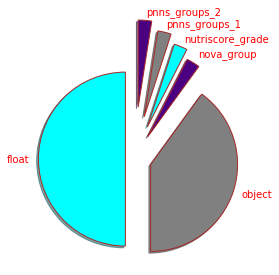

In [37]:
# Faire un graphique avec des différents types de données

piechart = df.dtypes.value_counts()

# Rajouter légende
legende = ['float', 'object', 'nova_group', 'nutriscore_grade', 'pnns_groups_1', 'pnns_groups_2']

# Rajouter un titre
#plt.title('Type de données du data set après nettoyage', size=15)

# Creating explode data 
explode = (0.1, 0.2, 0.3, 0.4, 0.5, 0.6) 
  
# Creating color parameters 
colors = ('cyan', 
          'grey', 'indigo') 
  
# Wedge properties 
wp = { 'linewidth' : 1, 'edgecolor' : 'brown' } 

plt.pie(piechart, 
        explode = explode,
        labels = legende, 
        shadow = True, 
        colors = colors, 
        startangle = 90, 
        wedgeprops = wp, 
        textprops = dict(color ='red'))

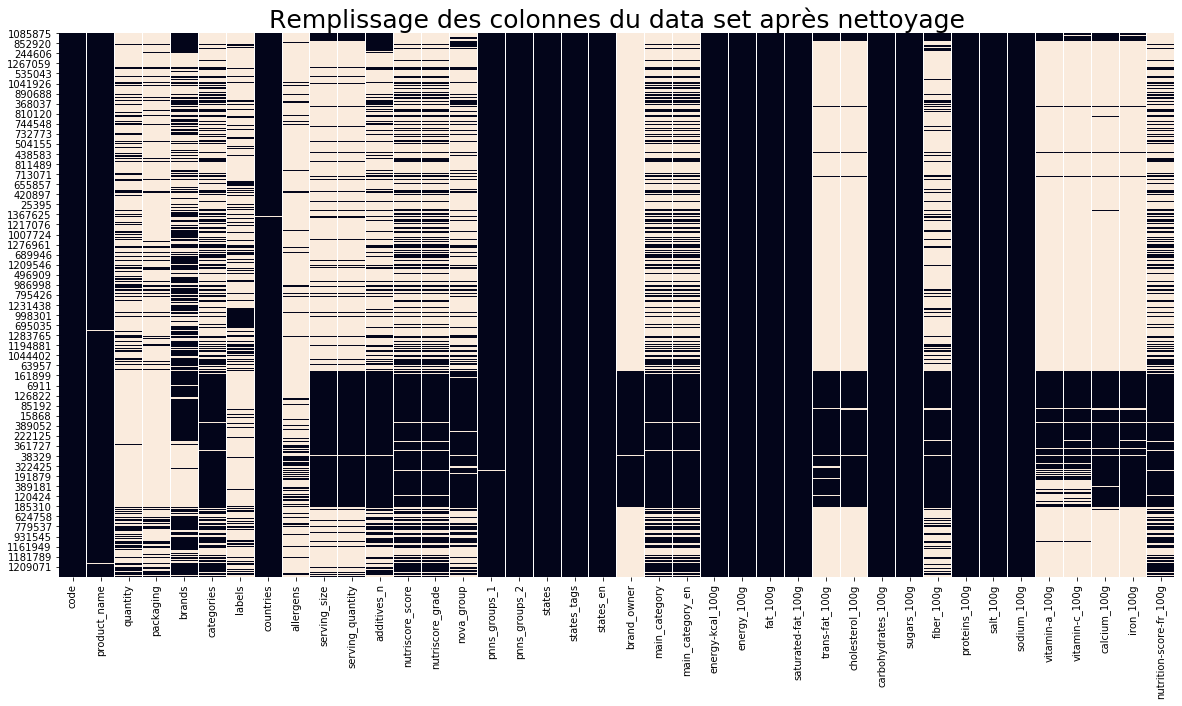

In [38]:
# Observation du taux de remplissage du df après filtrage 

# Taille
plt.figure(figsize=(20,10))

# Titre 
plt.title('Remplissage des colonnes du data set après nettoyage', size=25)

sns.heatmap(df.isna(), cbar=False)

### Sauvegarder une copie 

In [39]:
# Enregistrer ce nouveau data set avec les données nettoyées

df.to_csv('df_cleaned_hyp1.csv', encoding='utf8')

# Nettoyage pour Hypothèse 2 

NB : Ce nettoyage sera effectué dans le notebook 'Analyses', sur le fichier 'df_cleaned_hyp1', après les analyses univariées et les analyses bivariées en lien avec l'hypothèse 1 

### Filtrer les valeurs négatives et des valeurs maximales pour les nutriments pris en compte dans le calcul du ratio des lipides

- trans-fat_100g

In [40]:
trans_fat_ = (df['trans-fat_100g'] <= 100) & (df['trans-fat_100g'] >= 0)

df = df[trans_fat_]
df.sample(4)

,code,product_name,quantity,packaging,brands,categories,labels,countries,allergens,serving_size,serving_quantity,additives_n,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,brand_owner,main_category,main_category_en,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g
73991,0038000119118,"Assorted fruit flavored snacks, assorted",NaN,NaN,NaN,"Snacks, Sweet snacks, Confectioneries",NaN,United States,NaN,1 POUCH (22 g),22.0,7.0,13.0,d,4.0,Sugary snacks,Sweets,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",The Kellogg Company,en:confectioneries,Confectioneries,318.0,1331.0,0.00,0.00,0.0,0.0,77.27,50.00,0.0,4.55,0.0000,0.000,0.000000,0.2727,0.000,0.00000,13.0
207095,0078742083711,Steamable broccoli cuts,NaN,NaN,NaN,"Plant-based foods and beverages, Plant-based f...",NaN,United States,NaN,1 cup (85 g),85.0,0.0,-9.0,a,1.0,fruits-and-vegetables,vegetables,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...","Wal-Mart Stores, Inc.",en:frozen-vegetables,Frozen vegetables,29.0,121.0,0.00,0.00,0.0,0.0,4.71,1.18,3.5,2.35,0.0600,0.024,0.000441,0.0565,0.047,0.00085,-9.0
325210,0722252450029,"Luna, whole nutrition bar, dark chocolate haze...",NaN,NaN,Luna,Snacks,fr:entrepreneurs-engages,United States,NaN,1.48 ONZ (42 g),42.0,4.0,10.0,c,4.0,unknown,unknown,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",Clif Bar and Company,en:snacks,Snacks,429.0,1795.0,21.43,4.76,0.0,0.0,47.62,11.90,7.1,16.67,0.9525,0.381,0.000357,0.0214,0.833,0.01071,10.0
1096815,717544136917,"Mini baking chips, real semisweet chocolate",NaN,NaN,Sunny Select,Baking decorations,NaN,United States,NaN,132 PIECES (15 g),15.0,1.0,20.0,e,3.0,unknown,unknown,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",Super Store Industries,en:baking-decorations,Baking-decorations,467.0,1954.0,26.67,16.67,0.0,0.0,66.67,53.33,6.7,6.67,0.0000,0.000,0.000000,0.0000,0.000,0.00240,20.0


### Vérifier valeurs des nutriments par rapport au macronutriments

In [41]:
# Valeur des trans-fat doit être inférieur ou égal à valeu des fat

trans_fat = df['trans-fat_100g'] <= df['fat_100g']
df = df[trans_fat]
df.shape

(251510, 40)

In [42]:
# Valeur des fat doit être supérieur ou égal 
# à la somme des valeur des saturated-fat et des trans-fat

fat_tot = (df['saturated-fat_100g'] + df['trans-fat_100g']) <= df['fat_100g']
df = df[fat_tot]  
df.shape

(251462, 40)

### Caractéritiques du DF après nettoyage

In [43]:
# Vérification de la taille du fichier
df.shape

(251462, 40)

In [44]:
# Vérification du taux de valeurs manquantes par colonnes

# Taux de valeurs manquantes par colonnes
missing_rate = df.isna().sum()/df.shape[0]

# Trier par ordre croissant
missing_rate.sort_values(ascending=True)

code                       0.000000
salt_100g                  0.000000
proteins_100g              0.000000
sugars_100g                0.000000
carbohydrates_100g         0.000000
trans-fat_100g             0.000000
saturated-fat_100g         0.000000
fat_100g                   0.000000
energy_100g                0.000000
energy-kcal_100g           0.000000
states_tags                0.000000
states                     0.000000
pnns_groups_2              0.000000
states_en                  0.000000
sodium_100g                0.000008
countries                  0.000028
serving_quantity           0.000533
serving_size               0.000533
product_name               0.000779
pnns_groups_1              0.001074
additives_n                0.004506
cholesterol_100g           0.011863
fiber_100g                 0.019267
iron_100g                  0.032454
calcium_100g               0.034458
brand_owner                0.069187
nova_group                 0.070162
main_category              0

([<matplotlib.patches.Wedge at 0x7fbebb855d90>,
 [Text(-1.2000000000000002, 1.469576158976824e-16, 'float'),
  Text(1.2363734787060867, -0.4017220695359046, 'object'),
  Text(0.7314979445005414, 1.1936962583469393, 'nova_group'),
  Text(0.5740250917821114, 1.3858193222799786, 'nutriscore_grade'),
  Text(0.373512514799965, 1.5557918888102633, 'pnns_groups_1'),
  Text(0.13338038538335506, 1.6947594734342062, 'pnns_groups_2')])

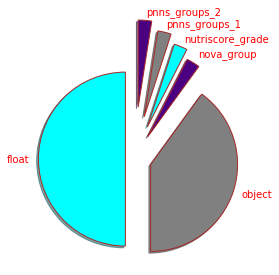

In [45]:
# Faire un graphique avec des différents types de données

piechart = df.dtypes.value_counts()

# Rajouter légende
legende = ['float', 'object', 'nova_group', 'nutriscore_grade', 'pnns_groups_1', 'pnns_groups_2']

# Rajouter un titre
#plt.title('Type de données du data set après nettoyage', size=15)

# Creating explode data 
explode = (0.1, 0.2, 0.3, 0.4, 0.5, 0.6) 
  
# Creating color parameters 
colors = ('cyan', 
          'grey', 'indigo') 
  
# Wedge properties 
wp = { 'linewidth' : 1, 'edgecolor' : 'brown' } 

plt.pie(piechart, 
        explode = explode,
        labels = legende, 
        shadow = True, 
        colors = colors, 
        startangle = 90, 
        wedgeprops = wp, 
        textprops = dict(color ='red'))

Text(0.5, 1, 'Remplissage des colonnes du data set après nettoyage')

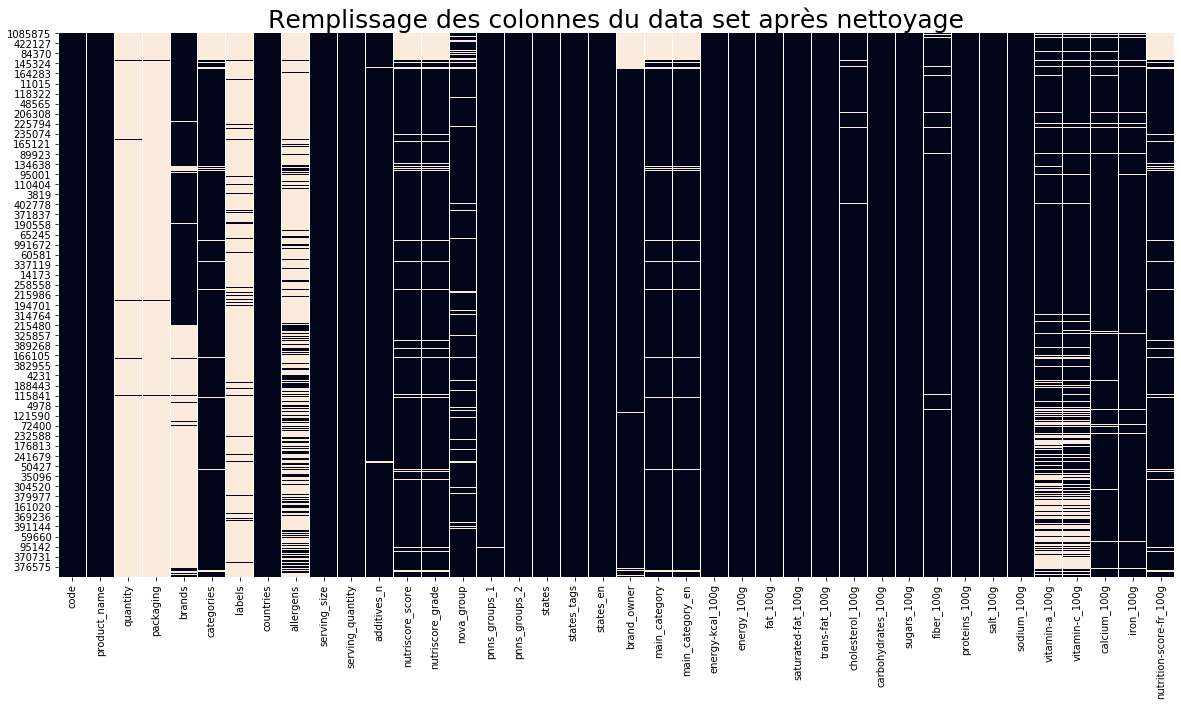

In [42]:
# Observation du taux de remplissage du df après filtrage 

# Taille 
plt.figure(figsize=(20,10))

# Titre 
plt.title('Remplissage des colonnes du data set après nettoyage', size=25)

sns.heatmap(df.isna(), cbar=False)

### Sauvegarder une copie 

In [46]:
# Enregistrer ce nouveau data set avec les données nettoyées

df.to_csv('df_cleaned_hyp2.csv', encoding='utf8')